In [4]:
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('outputs/ala1_trials_clean.csv')
df.T

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
id,1,2,3,4,5,6,7,8,9,10,...,491,492,493,494,495,496,497,498,499,500
project_name,psi,rmsd,phipsi,phipsi,phi,positions,rmsd,phi,psi,positions,...,positions,phipsi,phipsi,positions,phipsi,positions,phipsi,positions,positions,positions
status,SUCCEEDED,SUCCEEDED,SUCCEEDED,SUCCEEDED,SUCCEEDED,SUCCEEDED,SUCCEEDED,SUCCEEDED,SUCCEEDED,SUCCEEDED,...,SUCCEEDED,SUCCEEDED,SUCCEEDED,SUCCEEDED,SUCCEEDED,SUCCEEDED,SUCCEEDED,SUCCEEDED,SUCCEEDED,SUCCEEDED
parameters,"{'cluster__skip': '0', 'cluster__init_strategy...","{'cluster__skip': '0', 'cluster__init_strategy...","{'cluster__skip': '0', 'cluster__init_strategy...","{'cluster__skip': '0', 'cluster__init_strategy...","{'cluster__skip': '0', 'cluster__init_strategy...","{'cluster__skip': '0', 'cluster__init_strategy...","{'cluster__skip': '0', 'cluster__init_strategy...","{'cluster__skip': '0', 'cluster__init_strategy...","{'cluster__skip': '0', 'cluster__init_strategy...","{'cluster__skip': '0', 'cluster__init_strategy...",...,"{'cluster__skip': '0', 'cluster__init_strategy...","{'cluster__skip': '0', 'cluster__init_strategy...","{'cluster__skip': '0', 'cluster__init_strategy...","{'cluster__skip': '0', 'cluster__init_strategy...","{'cluster__skip': '0', 'cluster__init_strategy...","{'cluster__skip': '0', 'cluster__init_strategy...","{'cluster__skip': '0', 'cluster__init_strategy...","{'cluster__skip': '0', 'cluster__init_strategy...","{'cluster__skip': '0', 'cluster__init_strategy...","{'cluster__skip': '0', 'cluster__init_strategy..."
n_train_samples,"[375, 375, 375, 375, 375, 375, 375, 375, 375, ...","[375, 375, 375, 375, 375, 375, 375, 375, 375, ...","[375, 375, 375, 375, 375, 375, 375, 375, 375, ...","[375, 375, 375, 375, 375, 375, 375, 375, 375, ...","[375, 375, 375, 375, 375, 375, 375, 375, 375, ...","[375, 375, 375, 375, 375, 375, 375, 375, 375, ...","[375, 375, 375, 375, 375, 375, 375, 375, 375, ...","[375, 375, 375, 375, 375, 375, 375, 375, 375, ...","[375, 375, 375, 375, 375, 375, 375, 375, 375, ...","[375, 375, 375, 375, 375, 375, 375, 375, 375, ...",...,"[375, 375, 375, 375, 375, 375, 375, 375, 375, ...","[375, 375, 375, 375, 375, 375, 375, 375, 375, ...","[375, 375, 375, 375, 375, 375, 375, 375, 375, ...","[375, 375, 375, 375, 375, 375, 375, 375, 375, ...","[375, 375, 375, 375, 375, 375, 375, 375, 375, ...","[375, 375, 375, 375, 375, 375, 375, 375, 375, ...","[375, 375, 375, 375, 375, 375, 375, 375, 375, ...","[375, 375, 375, 375, 375, 375, 375, 375, 375, ...","[375, 375, 375, 375, 375, 375, 375, 375, 375, ...","[375, 375, 375, 375, 375, 375, 375, 375, 375, ..."
n_test_samples,"[375, 375, 375, 375, 375, 375, 375, 375, 375, ...","[375, 375, 375, 375, 375, 375, 375, 375, 375, ...","[375, 375, 375, 375, 375, 375, 375, 375, 375, ...","[375, 375, 375, 375, 375, 375, 375, 375, 375, ...","[375, 375, 375, 375, 375, 375, 375, 375, 375, ...","[375, 375, 375, 375, 375, 375, 375, 375, 375, ...","[375, 375, 375, 375, 375, 375, 375, 375, 375, ...","[375, 375, 375, 375, 375, 375, 375, 375, 375, ...","[375, 375, 375, 375, 375, 375, 375, 375, 375, ...","[375, 375, 375, 375, 375, 375, 375, 375, 375, ...",...,"[375, 375, 375, 375, 375, 375, 375, 375, 375, ...","[375, 375, 375, 375, 375, 375, 375, 375, 375, ...","[375, 375, 375, 375, 375, 375, 375, 375, 375, ...","[375, 375, 375, 375, 375, 375, 375, 375, 375, ...","[375, 375, 375, 375, 375, 375, 375, 375, 375, ...","[375, 375, 375, 375, 375, 375, 375, 375, 375, ...","[375, 375, 375, 375, 375, 375, 375, 375, 375, ...","[375, 375, 375, 375, 375, 375, 375, 375, 375, ...","[375, 375, 375, 375, 375, 375, 375, 375, 375, ...","[375, 375, 375, 375, 375, 375, 375, 375, 375, ..."
started,2020-04-21 12:55:06.985523,2020-04-21 12:55:09.036900,2020-04-21 12:55:10.956642,2020-04-21 12:55:10.958184,2020-04-21 12:55:13.076849,2020-04-21 12:55:32.027129,2020-04-21 12:55:43.379275,2020-04-21 12:55:43.905330,2020-04-21 12:55:50.797260,2020-04-21 12:55:52.822308,...,2020-04-22 03:34:10.076393,2020-04-

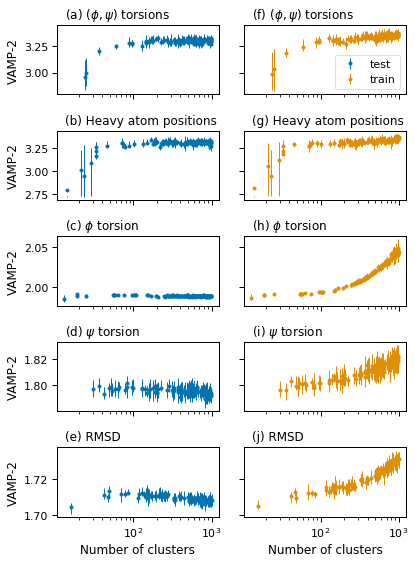

In [6]:
with sns.plotting_context('paper', font_scale=1.25):
    # labels
    feats = df['project_name'].unique()
    labs = {'phi': r'$\phi$ torsion', 'psi': r'$\psi$ torsion', 'phipsi': r'$(\phi, \psi)$ torsions', 
               'positions': '(x, y, z) coords.', 'rmsd': 'RMSD'}

    # ordering
    vamp_mean = df.groupby('project_name')['test_mean'].mean().reset_index()
    feat_order = vamp_mean.sort_values(by='test_mean')['project_name'][::-1]

    # colors and fig
    cols = sns.color_palette('colorblind', 3)
    fig, axes = plt.subplots(len(feats),2, figsize=(6, 8), sharey='row',sharex=True)
    
    # legend annoation
    handles = []
    labels = []
    for j, ds in enumerate(['test', 'train']):
        for i, feat in enumerate(feat_order): 
            # values
            x = df.loc[df['project_name']==feat, 'cluster__n_clusters'].values
            y = df.loc[df['project_name']==feat, ds+'_mean'].values
            ymin = df.loc[df['project_name']==feat, ds+'_q25'].values
            ymax = df.loc[df['project_name']==feat, ds+'_q75'].values

            # plot
            axes[i, j].errorbar(x, y, (y-ymin, ymax-y),  lw=0, elinewidth=1, marker='o', ms=3, 
                                color=cols[j], label=ds) 

            # annotate
            axes[i, j].annotate(s='({0}) {1}'.format(list('abcdefghij')[i+len(feats)*j], labs[feat]), xy=(0.05, 1.1), 
                               xycoords='axes fraction')
            axes[i, j].set_xscale('log')
            
            if j==0:
                axes[i, j].set_ylabel('VAMP-2')
            if i==len(feats)-1:
                axes[i, j].set_xlabel('Number of clusters')
            if (i==0):
                h, l = axes[i, j].get_legend_handles_labels()
                handles.extend(h)
                labels.extend(l)
                if j == 1: 
                    axes[i, j].legend(handles, labels)

    plt.tight_layout(h_pad=1)    
    plt.savefig('figures/train_test_results.png', dpi=450, bbox_inches='tight')